In [2]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats
import commands

In [42]:
# data_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
data_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/"
img_path = data_path+"processed/NIFTI/"
sub_path_42 = data_path+"external/R21_42_SphereProto3/"
sub_path_43 = data_path+"external/R21_43_Sphere_Proto3/"
sub_path_44 = data_path+"external/R21_44_Sphere_Proto3/"
sub_path_0106 = data_path+"external/R21_SUB01_SES06/"
sub_path_0303 = data_path+"external/R21_SUB03_SES03/"

In [4]:
def get_even_num(num=93):
    runs = []
    evens = []
    j = 0
    for i in range(num):
        if (i != 0) & (i != 2):
            if i % 2 == 0:
                evens.append(str(i))
                j += 1
                if j == 5: 
                    runs.append(evens)
                    evens = []
                    j = 0
    return runs

In [5]:
def get_minus_num(base_runs):
    li = []
    for i in range(len(base_runs)):
        li.append([[base_runs[i][1],base_runs[i][0]], [base_runs[i][3],base_runs[i][0]], [base_runs[i][1],base_runs[i][3]]])
    return li

In [6]:
base_runs = get_even_num()
bp = get_minus_num(base_runs)

In [7]:
base_runs

[['4', '6', '8', '10', '12'],
 ['14', '16', '18', '20', '22'],
 ['24', '26', '28', '30', '32'],
 ['34', '36', '38', '40', '42'],
 ['44', '46', '48', '50', '52'],
 ['54', '56', '58', '60', '62'],
 ['64', '66', '68', '70', '72'],
 ['74', '76', '78', '80', '82'],
 ['84', '86', '88', '90', '92']]

In [10]:
bp

[[['6', '4'], ['10', '4'], ['6', '10']],
 [['16', '14'], ['20', '14'], ['16', '20']],
 [['26', '24'], ['30', '24'], ['26', '30']],
 [['36', '34'], ['40', '34'], ['36', '40']],
 [['46', '44'], ['50', '44'], ['46', '50']],
 [['56', '54'], ['60', '54'], ['56', '60']],
 [['66', '64'], ['70', '64'], ['66', '70']],
 [['76', '74'], ['80', '74'], ['76', '80']],
 [['86', '84'], ['90', '84'], ['86', '90']]]

# Physics image

In [49]:
def create_roi_detrend(sub_path, bp, mins):
    cwd_path = sub_path+"bmaps/"
#   cwd_path = sub_path+"NIFTI/bmaps_numpy/"

    for n in range(len(bp)):
        for m in range(2):
            tdir = cwd_path+bp[n][m][0]+"minus"+bp[n][m][1]+"/"
            print commands.getoutput("fslroi "+tdir+"4d_fmap_Mean.nii.gz "+tdir+"4d_fmap_Mean_fslroi.nii.gz "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")
#             print commands.getoutput("fslroi "+tdir+"detrend1.nii.gz "+tdir+"detrend1_fslroi.nii.gz "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")
            print commands.getoutput("fslroi "+tdir+"detrend14d_fmap_Mean.nii.gz "+tdir+"detrend1_fslroi.nii.gz "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")


In [24]:
# 42
br = [['66', '68', '70', '72', '74'],
 ['76', '78', '80', '82', '84'],
 ['86', '88', '90', '92', '94']]
bp = get_minus_num(br)
mins = ['11', '19', '21']
create_roi_detrend(sub_path_42, bp, mins)

In [32]:
# 43
br = base_runs[3:5]
bp = get_minus_num(br)
mins = ['11', '28', '21']
create_roi_detrend(sub_path_43, bp, mins)

In [36]:
# 44
br = base_runs[3:6]
bp = get_minus_num(br)
mins = ['11', '28', '21']
create_roi_detrend(sub_path_44, bp, mins)

In [50]:
# Human 0106
br = base_runs[0:3]
bp = get_minus_num(br)
mins = ['11', '24', '21']
create_roi_detrend(sub_path_0106, bp, mins)

In [51]:
# Human 0303
br = base_runs[0:2]
bp = get_minus_num(br)
mins = ['12', '25', '24']
create_roi_detrend(sub_path_0303, bp, mins)

# ROAST image

In [54]:
def create_roi_roast(sub_path, bp, mins):
    cwd_path = sub_path+"bmaps/"
    roast_path_pos = sub_path+"roast/pos/"
#     roast_path_neg = sub_path+"roast/neg/"
    tdir_pos = cwd_path+bp[0][0][0]+"minus"+bp[0][0][1]+"/"
    tdir_neg = cwd_path+bp[0][1][0]+"minus"+bp[0][1][1]+"/"
    
    # Make ROAST image to MRI size
    print commands.getoutput("3dresample -master "+tdir_pos+"4d_fmap.nii.gz -prefix "+roast_path_pos+"Bfieldz_fmap.nii.gz -input "+roast_path_pos+"Bfieldz_wJ_nT.nii.gz")
#     print commands.getoutput("3dresample -master "+tdir_neg+"4d_fmap.nii.gz -prefix "+roast_path_neg+"Bfieldz_fmap.nii.gz -input "+roast_path_neg+"Bfieldz_wJ_nT.nii.gz")
    
    # Make ROI
    print commands.getoutput("fslroi "+roast_path_pos+"Bfieldz_fmap.nii.gz "+roast_path_pos+"Bfieldz_fmap_fslroi.nii.gz "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")
#     print commands.getoutput("fslroi "+roast_path_neg+"Bfieldz_fmap.nii.gz "+roast_path_neg+"Bfieldz_fmap_fslroi.nii.gz "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")
    

In [27]:
# 42
br = [['66', '68', '70', '72', '74'],
 ['76', '78', '80', '82', '84'],
 ['86', '88', '90', '92', '94']]
bp = get_minus_num(br)
mins = ['11', '19', '21']
create_roi_roast(sub_path_42, bp, mins)

** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_42_SphereProto3/roast/pos/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_42_SphereProto3/roast/neg/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.




In [38]:
# 43
br = base_runs[3:5]
bp = get_minus_num(br)
mins = ['11', '28', '21']
create_roi_roast(sub_path_43, bp, mins)

** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_43_Sphere_Proto3/roast/pos/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_43_Sphere_Proto3/roast/neg/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.




In [39]:
# 44
br = base_runs[3:6]
bp = get_minus_num(br)
mins = ['11', '28', '21']
create_roi_roast(sub_path_44, bp, mins)

** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_44_Sphere_Proto3/roast/pos/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_44_Sphere_Proto3/roast/neg/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.




In [55]:
# Human 0106
br = base_runs[0:3]
bp = get_minus_num(br)
mins = ['11', '24', '21']
create_roi_roast(sub_path_0106, bp, mins)

** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_SUB01_SES06/roast/pos/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.



In [56]:
# Human 0303
br = base_runs[0:2]
bp = get_minus_num(br)
mins = ['11', '25', '24']
create_roi_roast(sub_path_0303, bp, mins)

** AFNI converts NIFTI_datatype=64 (FLOAT64) in file /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/external/R21_SUB03_SES03/roast/pos/Bfieldz_wJ_nT.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.



# Prediction image

In [28]:
def create_roi_predict(files, mins):
    cwd_path = img_path+"ROI/"
    
    for n in range(len(files)):
        print commands.getoutput("fslroi "+img_path+files[n]+" "+cwd_path+files[n]+" "+mins[0]+" 20 "+mins[1]+" 20 "+mins[2]+" 20")
        

In [29]:
# 42
nifti = [
'nn_nonzero_best_cly_42_1_neg.nii.gz',
'nn_nonzero_best_cly_42_1_pos.nii.gz',
'nn_nonzero_best_cly_42_2_neg.nii.gz',
'nn_nonzero_best_cly_42_2_pos.nii.gz',
'nn_nonzero_best_cly_42_3_neg.nii.gz',
'nn_nonzero_best_cly_42_3_pos.nii.gz']
mins = ['11', '19', '21']
create_roi_predict(nifti, mins)

In [40]:
# 43
nifti = [
'nn_nonzero_best_cly_43_1_neg.nii.gz',
'nn_nonzero_best_cly_43_1_pos.nii.gz',
'nn_nonzero_best_cly_43_2_neg.nii.gz',
'nn_nonzero_best_cly_43_2_pos.nii.gz']
mins = ['11', '28', '21']
create_roi_predict(nifti, mins)

In [41]:
# 44
nifti = [
'nn_nonzero_best_cly_44_1_neg.nii.gz',
'nn_nonzero_best_cly_44_1_pos.nii.gz',
'nn_nonzero_best_cly_44_2_neg.nii.gz',
'nn_nonzero_best_cly_44_2_pos.nii.gz',
'nn_nonzero_best_cly_44_3_neg.nii.gz',
'nn_nonzero_best_cly_44_3_pos.nii.gz']
mins = ['11', '28', '21']
create_roi_predict(nifti, mins)

In [57]:
# Human 0106
nifti = [
'nn_nonzero_best_cly_0106_1_neg.nii.gz',
'nn_nonzero_best_cly_0106_1_pos.nii.gz',
'nn_nonzero_best_cly_0106_2_neg.nii.gz',
'nn_nonzero_best_cly_0106_2_pos.nii.gz',
'nn_nonzero_best_cly_0106_3_neg.nii.gz',
'nn_nonzero_best_cly_0106_3_pos.nii.gz']
mins = ['11', '24', '21']
create_roi_predict(nifti, mins)

In [58]:
# Human 0303
nifti = [
'nn_nonzero_best_cly_0303_1_neg.nii.gz',
'nn_nonzero_best_cly_0303_1_pos.nii.gz',
'nn_nonzero_best_cly_0303_2_neg.nii.gz',
'nn_nonzero_best_cly_0303_2_pos.nii.gz']
mins = ['12', '25', '24']
create_roi_predict(nifti, mins)

# Physical vs Theory

In [158]:
def plotMRIvsROAST(sub_path, bp, subplot, axis):
    cwd_path = sub_path+"bmaps/"
    roast_path_pos = sub_path+"roast/pos/"
    
    fig, axs = plt.subplots(subplot[0], subplot[1], figsize=(15, 5))
        
    for i in range(len(bp)):
        tdir = cwd_path+bp[i][0][0]+"minus"+bp[i][0][1]+"/"

        # ROI
        img_meas = nib.load(tdir+"/detrend1_fslroi.nii.gz")
        img_theo = nib.load(roast_path_pos+"/Bfieldz_fmap_fslroi.nii.gz")

        data_meas = img_meas.get_data()
        data_theo = img_theo.get_data()
        x = data_theo.flatten()
        y = data_meas.flatten()

        m, b, r, p, st_er = stats.linregress(x,y) 

        yfit = [b + m * xi for xi in x]
        yisx = [0 + 1 * xi for xi in x]
        
        axs[i].plot(x, yfit)
        axs[i].plot(x, yisx)

        axs[i].scatter(x, y,  color='black')
        axs[i].axis(axis)
        axs[i].set_xlabel("Theory (nT)")
        axs[i].set_ylabel("Physics (nT)")
        axs[i].set_title("Physics vs Theory", fontsize=15)
        print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
        print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

r: 0.92878, st_er: 0.003879
y = 0.8694*x + 2.0852
r: 0.92535, st_er: 0.003560
y = 0.7771*x + 0.0571
r: 0.90133, st_er: 0.004452
y = 0.8286*x + -0.1411


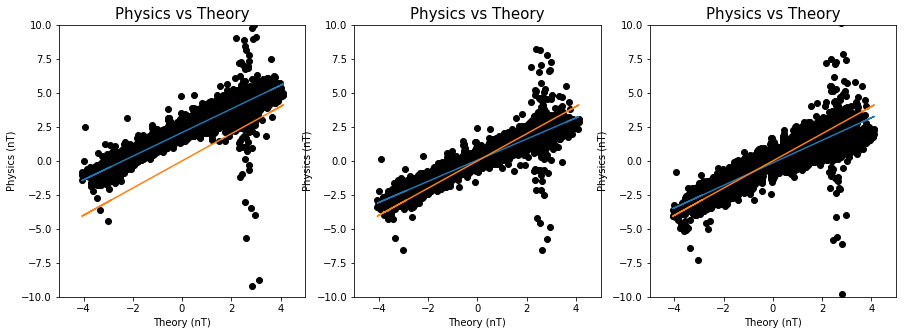

In [159]:
# 42
br = [['66', '68', '70', '72', '74'],
 ['76', '78', '80', '82', '84'],
 ['86', '88', '90', '92', '94']]
bp = get_minus_num(br)
plotMRIvsROAST(sub_path_42, bp, [1,3], [-5, 5, -10, 10])

r: 0.95367, st_er: 0.002618
y = 0.7421*x + 0.1522
r: 0.91754, st_er: 0.003426
y = 0.707*x + -0.6236


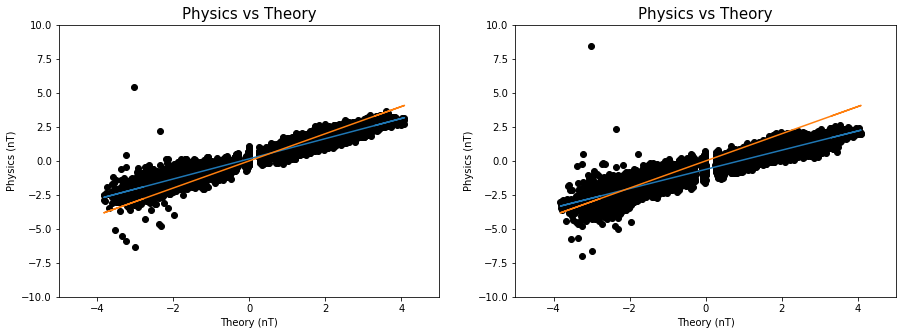

In [160]:
# 43
br = base_runs[3:5]
bp = get_minus_num(br)
plotMRIvsROAST(sub_path_43, bp, [1,2], [-5, 5, -10, 10])

r: 0.90302, st_er: 0.002918
y = 0.5486*x + 0.2817
r: 0.95476, st_er: 0.002608
y = 0.7488*x + -0.554
r: 0.96403, st_er: 0.002919
y = 0.9468*x + -1.3843


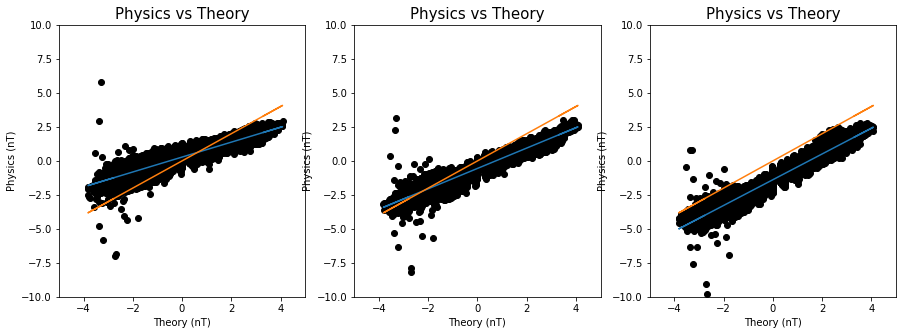

In [161]:
# 44
br = base_runs[3:6]
bp = get_minus_num(br)
plotMRIvsROAST(sub_path_44, bp, [1,3], [-5, 5, -10, 10])

r: 0.02597, st_er: 1.754761
y = 4.0775*x + -0.3211
r: -0.01019, st_er: 1.808296
y = -1.6484*x + -3.4844
r: 0.02266, st_er: 2.186331
y = 4.4316*x + -0.5603


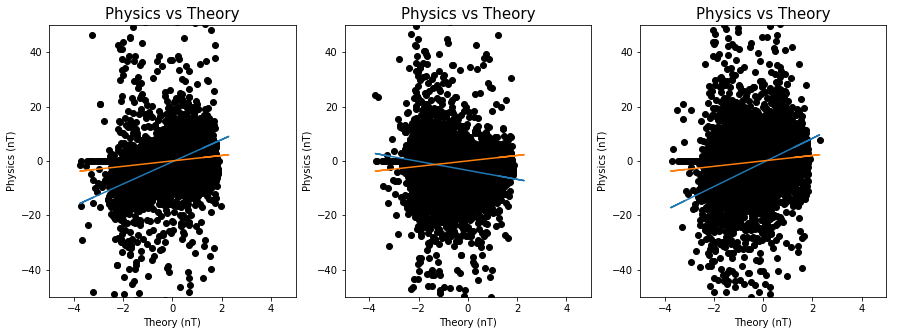

In [162]:
# Human 0106
br = base_runs[0:3]
bp = get_minus_num(br)
plotMRIvsROAST(sub_path_0106, bp, [1,3], [-5, 5, -50, 50])

r: -0.00472, st_er: 0.480091
y = -0.2027*x + 0.3095
r: 0.01471, st_er: 0.506433
y = 0.6661*x + -5.1455


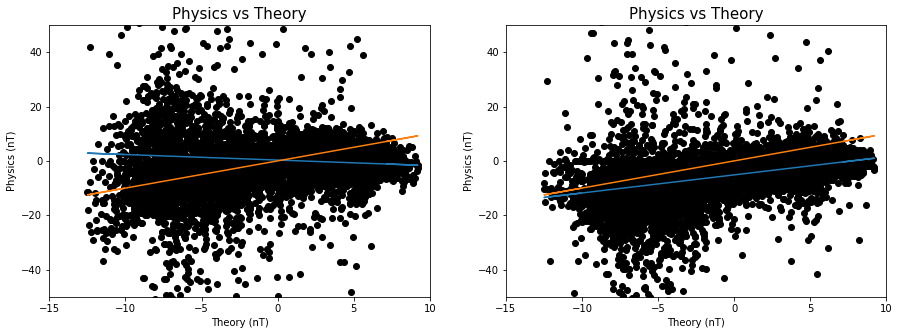

In [163]:
# Human 0303
br = base_runs[0:2]
bp = get_minus_num(br)
plotMRIvsROAST(sub_path_0303, bp, [1,2], [-15, 10, -50, 50])

# Prediction vs Theory

In [147]:
def plotPredvsROAST(sub_path, files, subplot, axis):
    cwd_path = img_path+"ROI/"
    roast_path_pos = sub_path+"roast/pos/"
    
    fig, axs = plt.subplots(subplot[0], subplot[1], figsize=(15, 5))
        
    for i in range(len(files)):
        # ROI
        img_meas = nib.load(cwd_path+files[i])
        img_theo = nib.load(roast_path_pos+"/Bfieldz_fmap_fslroi.nii.gz")

        data_meas = img_meas.get_data()
        data_theo = img_theo.get_data()
        x = data_theo.flatten()
        y = data_meas.flatten()

        m, b, r, p, st_er = stats.linregress(x,y) 

        yfit = [b + m * xi for xi in x]
        yisx = [0 + 1 * xi for xi in x]
        
        axs[i].plot(x, yfit)
        axs[i].plot(x, yisx)

        axs[i].scatter(x, y,  color='black')
        axs[i].axis(axis)
        axs[i].set_xlabel("Theory (nT)")
        axs[i].set_ylabel("Prediction (nT)")
        axs[i].set_title("Prediction vs Theory", fontsize=15)
        print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
        print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

r: 0.93983, st_er: 0.004456
y = 1.0963*x + 3.0049
r: 0.93635, st_er: 0.003794
y = 0.9049*x + 0.6945
r: 0.89606, st_er: 0.005239
y = 0.9458*x + 0.2866


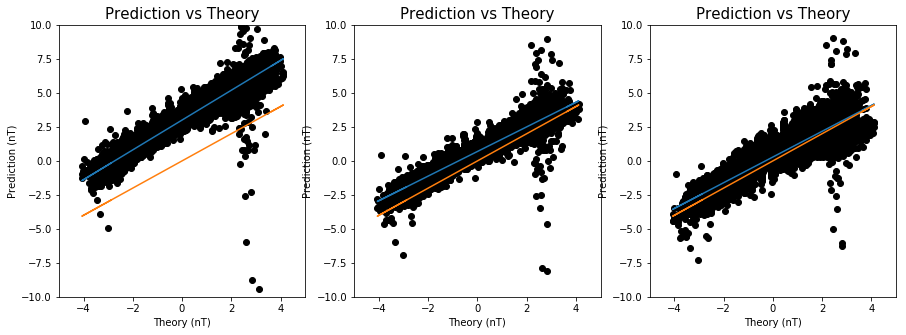

In [148]:
# 42
nifti = [
'nn_nonzero_best_cly_42_1_pos.nii.gz',
'nn_nonzero_best_cly_42_2_pos.nii.gz',
'nn_nonzero_best_cly_42_3_pos.nii.gz']
plotPredvsROAST(sub_path_42, nifti, [1,3], [-5, 5, -10, 10])

r: 0.93543, st_er: 0.003494
y = 0.8269*x + 1.3912
r: 0.93591, st_er: 0.004694
y = 1.1153*x + -0.1199


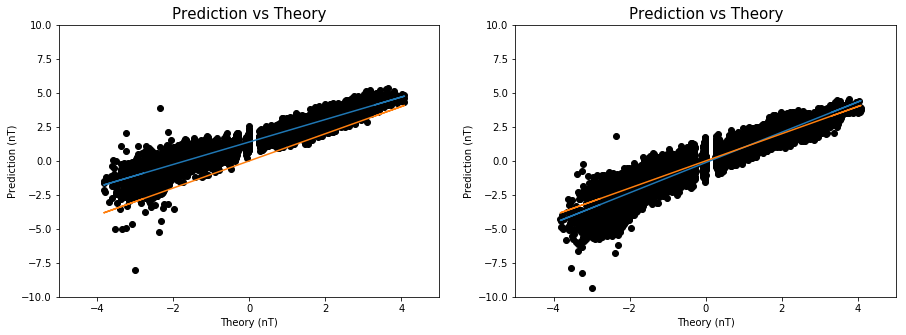

In [149]:
# 43
nifti = [
'nn_nonzero_best_cly_43_1_pos.nii.gz',
'nn_nonzero_best_cly_43_2_pos.nii.gz']
plotPredvsROAST(sub_path_43, nifti, [1,2], [-5, 5, -10, 10])

r: 0.88730, st_er: 0.003603
y = 0.62*x + 1.125
r: 0.95403, st_er: 0.003676
y = 1.0465*x + -0.2968
r: 0.96450, st_er: 0.004000
y = 1.3067*x + -1.393


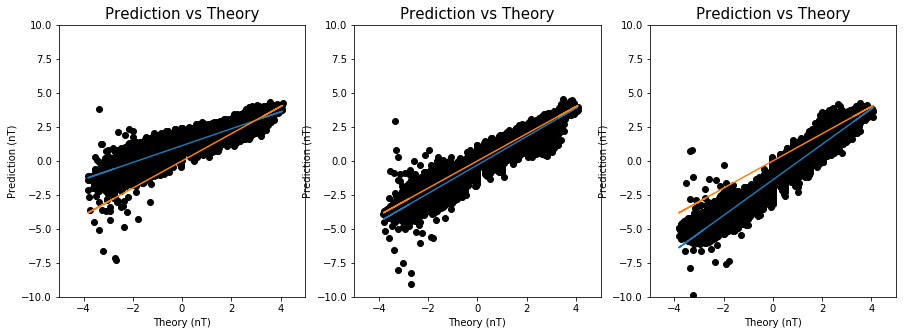

In [150]:
# 44
nifti = [
'nn_nonzero_best_cly_44_1_pos.nii.gz',
'nn_nonzero_best_cly_44_2_pos.nii.gz',
'nn_nonzero_best_cly_44_3_pos.nii.gz']
plotPredvsROAST(sub_path_44, nifti, [1,3], [-5, 5, -10, 10])

r: 0.23339, st_er: 0.260093
y = 5.5829*x + 0.9417
r: -0.02331, st_er: 0.270442
y = -0.564*x + -5.7686
r: 0.10948, st_er: 0.537000
y = 5.2897*x + 0.207


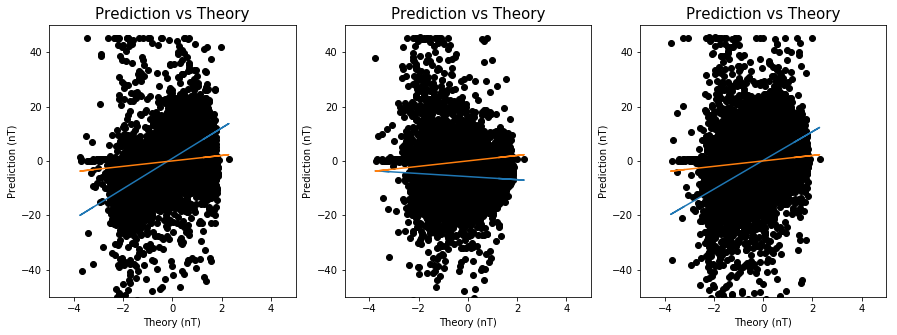

In [153]:
# Human 0106
nifti = [
'nn_nonzero_best_cly_0106_1_pos.nii.gz',
'nn_nonzero_best_cly_0106_2_pos.nii.gz',
'nn_nonzero_best_cly_0106_3_pos.nii.gz']
plotPredvsROAST(sub_path_0106, nifti, [1,3], [-5, 5, -50, 50])

r: 0.06632, st_er: 0.069917
y = 0.4156*x + -0.0509
r: 0.05458, st_er: 0.098704
y = 0.4825*x + -6.336


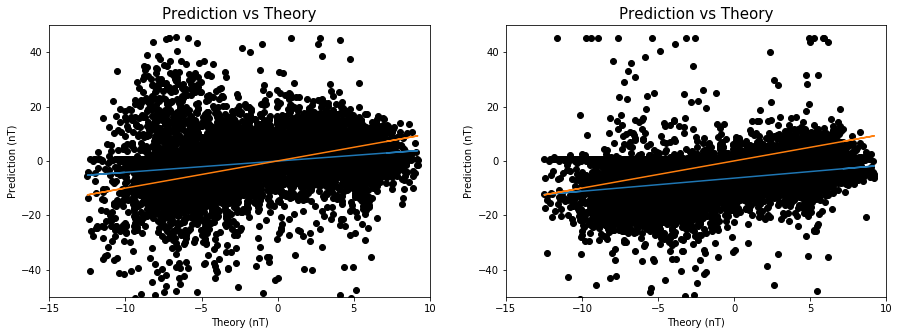

In [157]:
# Human 0303
nifti = [
'nn_nonzero_best_cly_0303_1_pos.nii.gz',
'nn_nonzero_best_cly_0303_2_pos.nii.gz']
plotPredvsROAST(sub_path_0303, nifti, [1,2], [-15, 10, -50, 50])

# Prediction vs Detrend

In [138]:
def plotMRIvsPrediction(sub_path, bp, files, subplot, axis):
    cwd_path = sub_path+"bmaps/"
    pred_path = img_path+"ROI/"
    
    fig, axs = plt.subplots(subplot[0], subplot[1], figsize=(15, 5))
        
    for i in range(len(bp)):
        tdir = cwd_path+bp[i][0][0]+"minus"+bp[i][0][1]+"/"

        # ROI
        img_meas = nib.load(pred_path+files[i])
        img_theo = nib.load(tdir+"/detrend1_fslroi.nii.gz")

        data_meas = img_meas.get_data()
        data_theo = img_theo.get_data()
        x = data_theo.flatten()
        y = data_meas.flatten()

        m, b, r, p, st_er = stats.linregress(x,y) 

        yfit = [b + m * xi for xi in x]
        yisx = [0 + 1 * xi for xi in x]
        
        axs[i].plot(x, yfit)
        axs[i].plot(x, yisx)

        axs[i].scatter(x, y,  color='black')
        axs[i].axis(axis)
        axs[i].set_xlabel("Physics (nT)")
        axs[i].set_ylabel("Prediction (nT)")
        axs[i].set_title("Prediction vs Physics", fontsize=15)
        print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
        print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

r: 0.98517, st_er: 0.002391
y = 1.2278*x + 0.4416
r: 0.98561, st_er: 0.002175
y = 1.1342*x + 0.6271
r: 0.98832, st_er: 0.001956
y = 1.1347*x + 0.4461


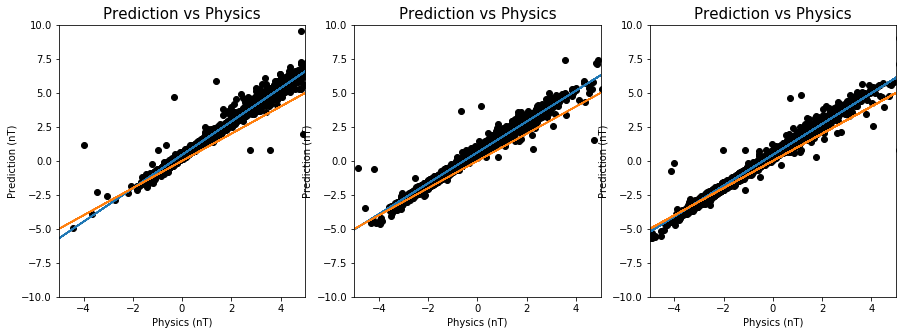

In [139]:
# 42
br = [['66', '68', '70', '72', '74'],
 ['76', '78', '80', '82', '84'],
 ['86', '88', '90', '92', '94']]
bp = get_minus_num(br)
nifti = [
'nn_nonzero_best_cly_42_1_pos.nii.gz',
'nn_nonzero_best_cly_42_2_pos.nii.gz',
'nn_nonzero_best_cly_42_3_pos.nii.gz']
plotMRIvsPrediction(sub_path_42, bp, nifti, [1,3], [-5, 5, -10, 10])

r: 0.99051, st_er: 0.001746
y = 1.1253*x + 1.2188
r: 0.99368, st_er: 0.001941
y = 1.5368*x + 0.8426


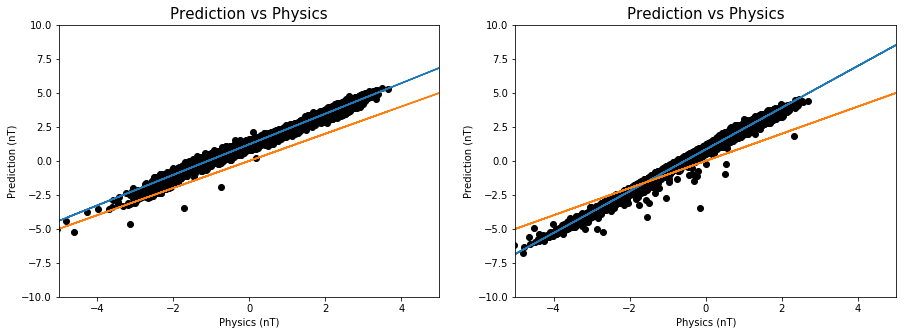

In [140]:
# 43
br = base_runs[3:5]
bp = get_minus_num(br)
nifti = [
'nn_nonzero_best_cly_43_1_pos.nii.gz',
'nn_nonzero_best_cly_43_2_pos.nii.gz']
plotMRIvsPrediction(sub_path_43, bp, nifti, [1,2], [-5, 5, -10, 10])

r: 0.98332, st_er: 0.002339
y = 1.1309*x + 0.8064
r: 0.99093, st_er: 0.002102
y = 1.3861*x + 0.4723
r: 0.99550, st_er: 0.001462
y = 1.3732*x + 0.5089


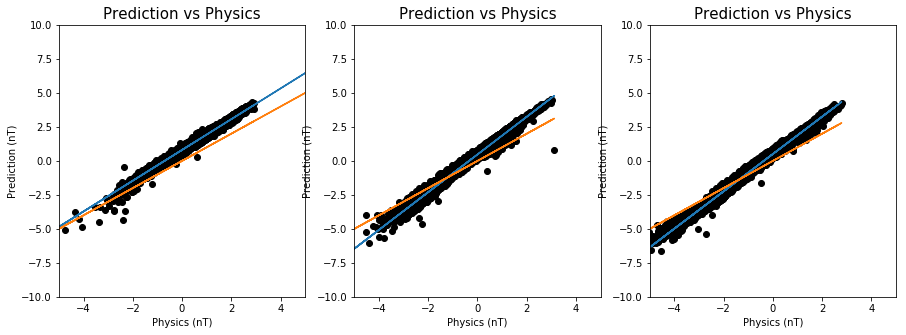

In [141]:
# 44
br = base_runs[3:6]
bp = get_minus_num(br)
nifti = [
'nn_nonzero_best_cly_44_1_pos.nii.gz',
'nn_nonzero_best_cly_44_2_pos.nii.gz',
'nn_nonzero_best_cly_44_3_pos.nii.gz']
plotMRIvsPrediction(sub_path_44, bp, nifti, [1,3], [-5, 5, -10, 10])

r: 0.31557, st_er: 0.001617
y = 0.0481*x + -0.2985
r: 0.15266, st_er: 0.001653
y = 0.0228*x + -5.5663
r: 0.50176, st_er: 0.002389
y = 0.124*x + -0.8285


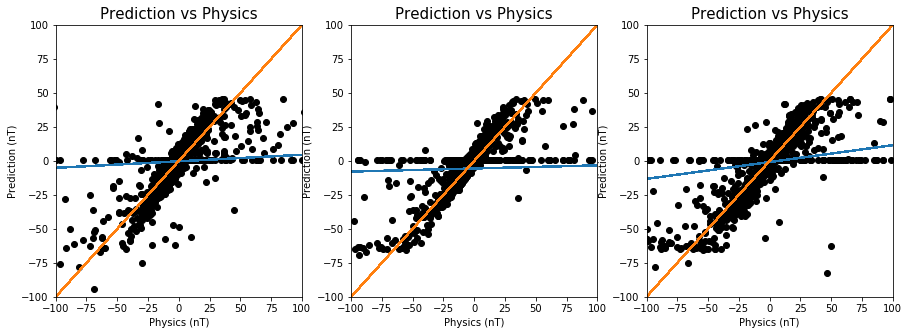

In [142]:
# Human 0106
br = base_runs[0:3]
bp = get_minus_num(br)
nifti = [
'nn_nonzero_best_cly_0106_1_pos.nii.gz',
'nn_nonzero_best_cly_0106_2_pos.nii.gz',
'nn_nonzero_best_cly_0106_3_pos.nii.gz']
plotMRIvsPrediction(sub_path_0106, bp, nifti, [1,3], [-100, 100, -100, 100])

r: 0.00541, st_er: 0.002003
y = 0.001*x + -0.5255
r: 0.00320, st_er: 0.002743
y = 0.0008*x + -6.886


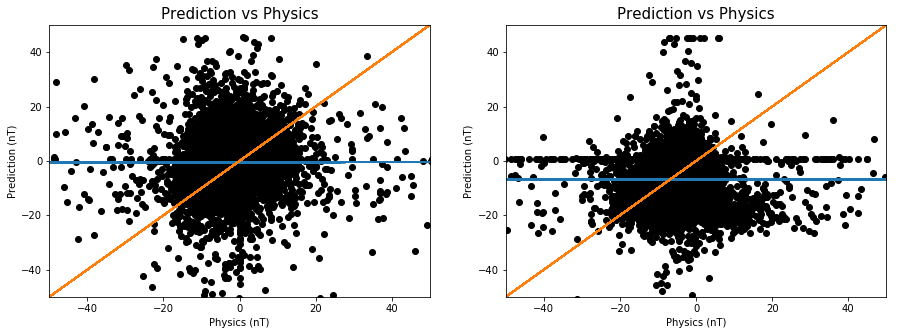

In [145]:
# Human 0303
br = base_runs[0:2]
bp = get_minus_num(br)
nifti = [
'nn_nonzero_best_cly_0303_1_pos.nii.gz',
'nn_nonzero_best_cly_0303_2_pos.nii.gz']
plotMRIvsPrediction(sub_path_0106, bp, nifti, [1,2], [-50, 50, -50, 50])